In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
import collections
import numpy as np
import pandas as pd
import datetime
import random
import scipy.stats as cov

In [4]:
product_codes = pd.read_excel("problem2/PL_CSA_HNW_2015.xlsx", sheetname="Mnemonic CASA product code")

IOError: [Errno 2] No such file or directory: 'problem2/PL_CSA_HNW_2015.xlsx'

In [5]:
casa_dec = pd.read_csv("problem2/casa_txn_dec14", sep="|")
casa_jan = pd.read_csv("problem2/casa_txn_jan15", sep="|")
casa_feb = pd.read_csv("problem2/casa_txn_feb15", sep="|")

IOError: File problem2/casa_txn_dec14 does not exist

In [6]:
debit_trans = pd.read_csv("problem2/Debit_card_transaction_data_PL", sep="|")

IOError: File problem2/Debit_card_transaction_data_PL does not exist

In [7]:
customers  = pd.read_csv("problem2/Customer_level_data_PL", sep="|")
responder_value_counts = customers["RESPONDER"].value_counts()

IOError: File problem2/Customer_level_data_PL does not exist

In [8]:
customers["net_rel_sqrt"] = np.sqrt(customers["Net_relationship_value"])
customers["AQB_SQRT"] = np.sqrt(customers["AQB"])
customers["RATIO_FEB_SQRT"] = np.sqrt(customers["RATIO_EOP_BAL_FEB15"])

NameError: name 'customers' is not defined

In [9]:
def plot_discrete_continuous(col):
    df_discrete = pd.pivot_table(customers,values='ID', index=col, columns='RESPONDER', aggfunc=np.count_nonzero)
    df_discrete[0] = np.sqrt(df_discrete[0])
    df_discrete.plot(kind="bar", figsize=(20,15))

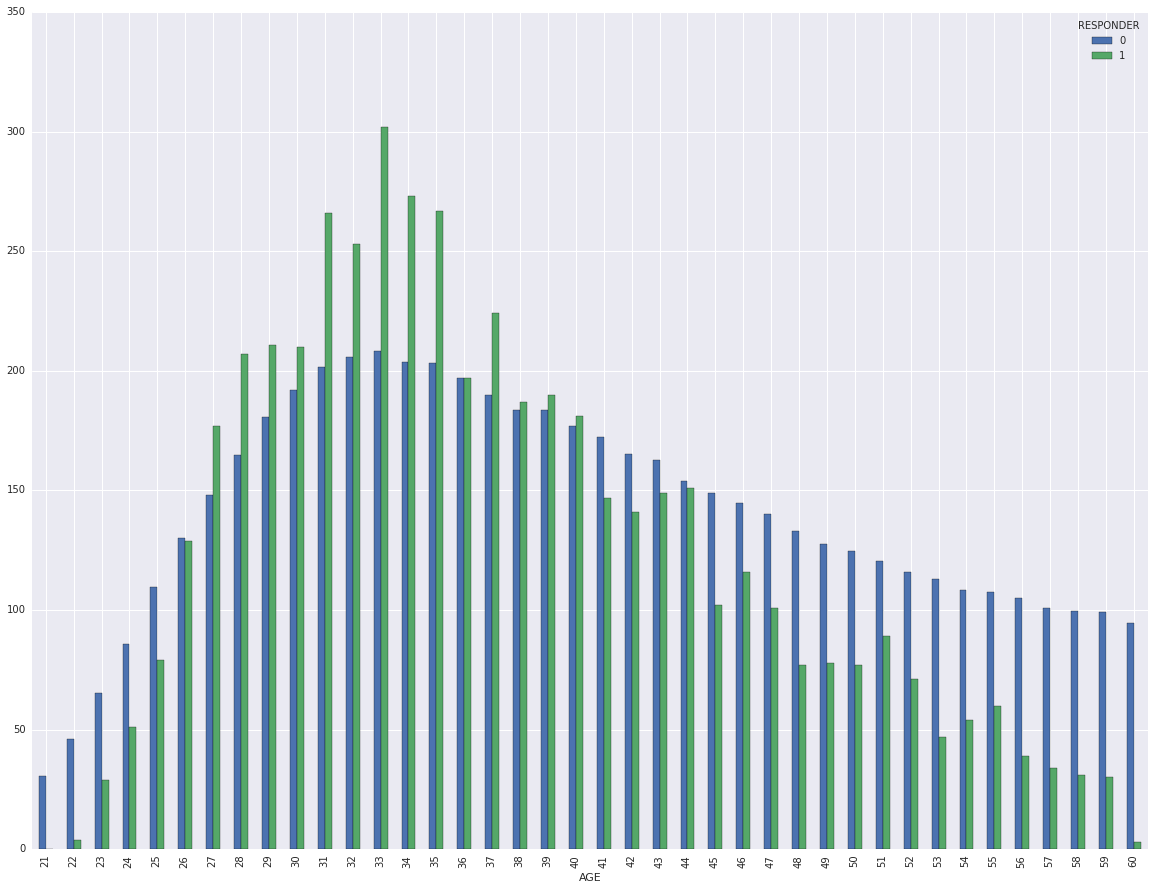

In [8]:
plot_discrete_continuous("AGE")

In [9]:
cust_respond = customers[customers["RESPONDER"]==1]
cust_not_res = customers[customers["RESPONDER"]==0]

In [2]:
plt.figure(figsize=(20,10))
plt.axis([-100, 2000, 0, 0.0033])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["AQB_SQRT"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["AQB_SQRT"], hist=False, label="NON RESPONDER", ax = ax, color="g")
    
#ax = sns.distplot(cust_respond["AQB_SQRT"], hist=False, label="RESPONDER")
#sns.distplot(cust_not_res["AQB_SQRT"], hist=False, label="NON RESPONDER", ax = ax)

NameError: name 'plt' is not defined

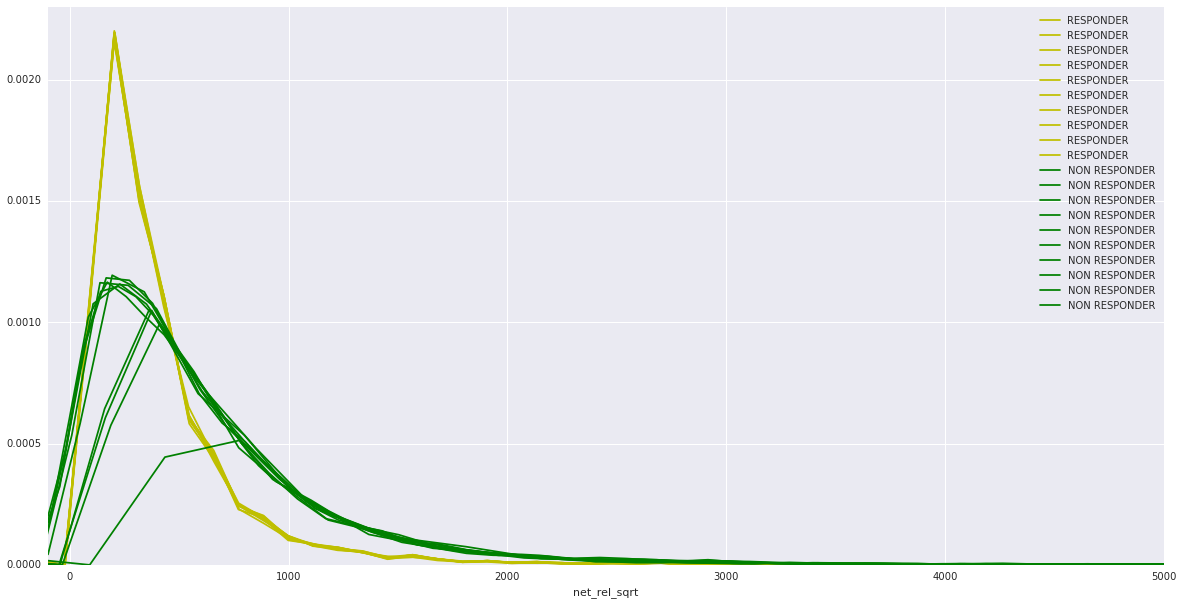

In [11]:
plt.figure(figsize=(20,10))
plt.axis([-100, 5000, 0, 0.0023])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["net_rel_sqrt"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["net_rel_sqrt"], hist=False, label="NON RESPONDER", ax = ax, color="g")
    
#ax = sns.distplot(cust_respond["net_rel_sqrt"], hist=False, label="RESPONDER")
#sns.distplot(cust_not_res["net_rel_sqrt"], hist=False, label="NON RESPONDER", ax = ax)

In [12]:
def plot_categorical_variable_avg(col):
    total_rounds = 10
    
    res_avg_df = pd.DataFrame()
    for i in range(total_rounds):
        random.seed(i)
        rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
        cust_res_sample = cust_respond.ix[rows]
        col_val_counts = pd.DataFrame(cust_res_sample[col].value_counts())
        col_val_counts = col_val_counts/int(0.8*len(cust_respond))
        res_avg_df = res_avg_df.add(col_val_counts, fill_value=0)
    res_avg_df = res_avg_df/total_rounds
    res_avg_df.columns = [1]
    
    not_res_avg_df = pd.DataFrame()
    for i in range(total_rounds):
        random.seed(i)
        rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
        cust_not_res_sample = cust_not_res.ix[rows]
        col_val_counts = pd.DataFrame(cust_not_res_sample[col].value_counts())
        col_val_counts = col_val_counts/int(0.8*len(cust_respond))
        not_res_avg_df = not_res_avg_df.add(col_val_counts, fill_value=0)
    not_res_avg_df = not_res_avg_df/total_rounds
    not_res_avg_df.columns = [0]
    
    res_avg_df[0] = 0
    for index in res_avg_df.index.values:
        res_avg_df.ix[index,0] = not_res_avg_df.ix[index][0]
    res_avg_df.plot(kind="bar", figsize=(20,10))

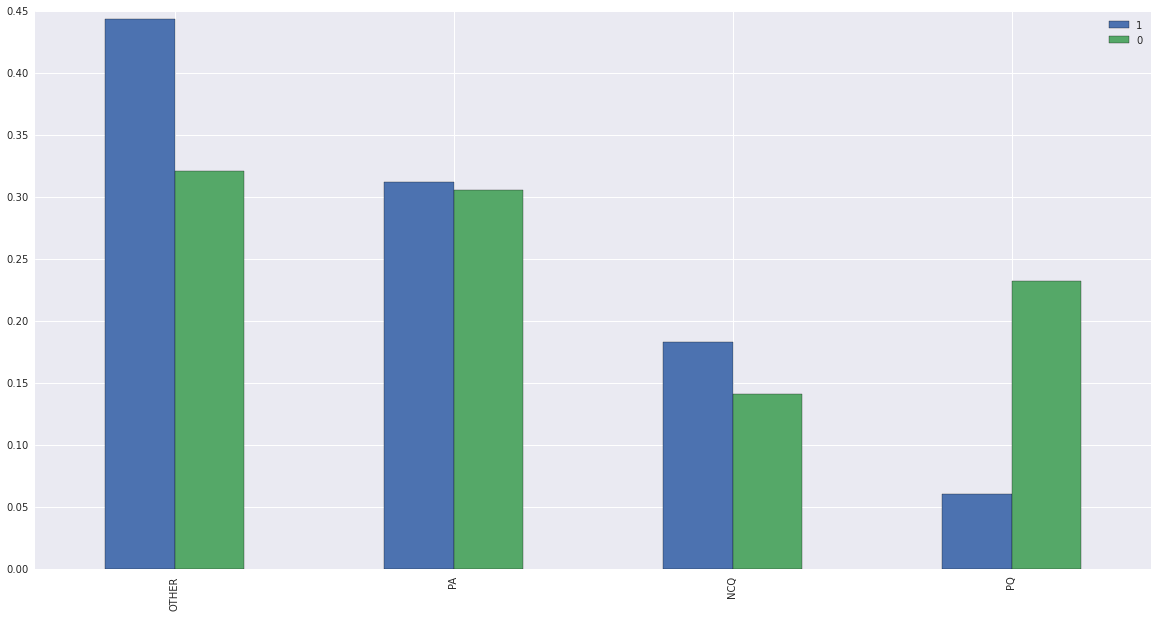

In [13]:
plot_categorical_variable_avg("PAPQ_Tag")

In [14]:
def plot_categorical_variable(col):
    df_categorical = pd.pivot_table(customers, values="ID", index="RESPONDER", columns=col, aggfunc=np.count_nonzero)
    df_categorical.ix[0] = df_categorical.ix[0]/responder_value_counts[0]
    df_categorical.ix[1] = df_categorical.ix[1]/responder_value_counts[1]
    df_categorical = df_categorical.ix[:,0:8]
    df_categorical.plot(kind="bar", figsize=(20,10))

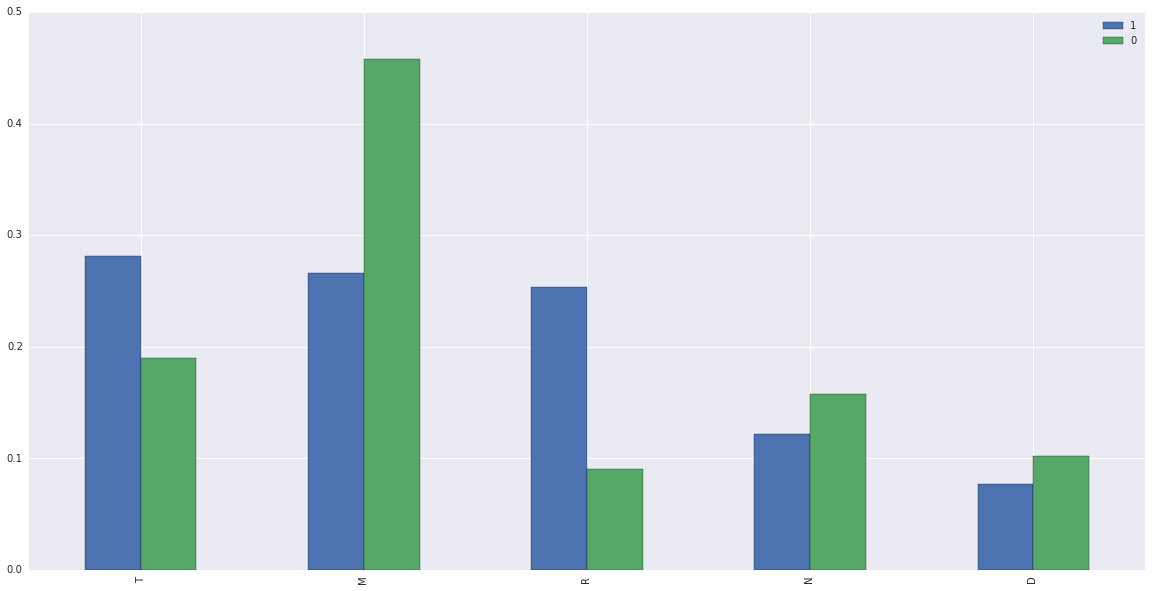

In [15]:
plot_categorifcal_variable_avg("Transactor_revolver_tag")

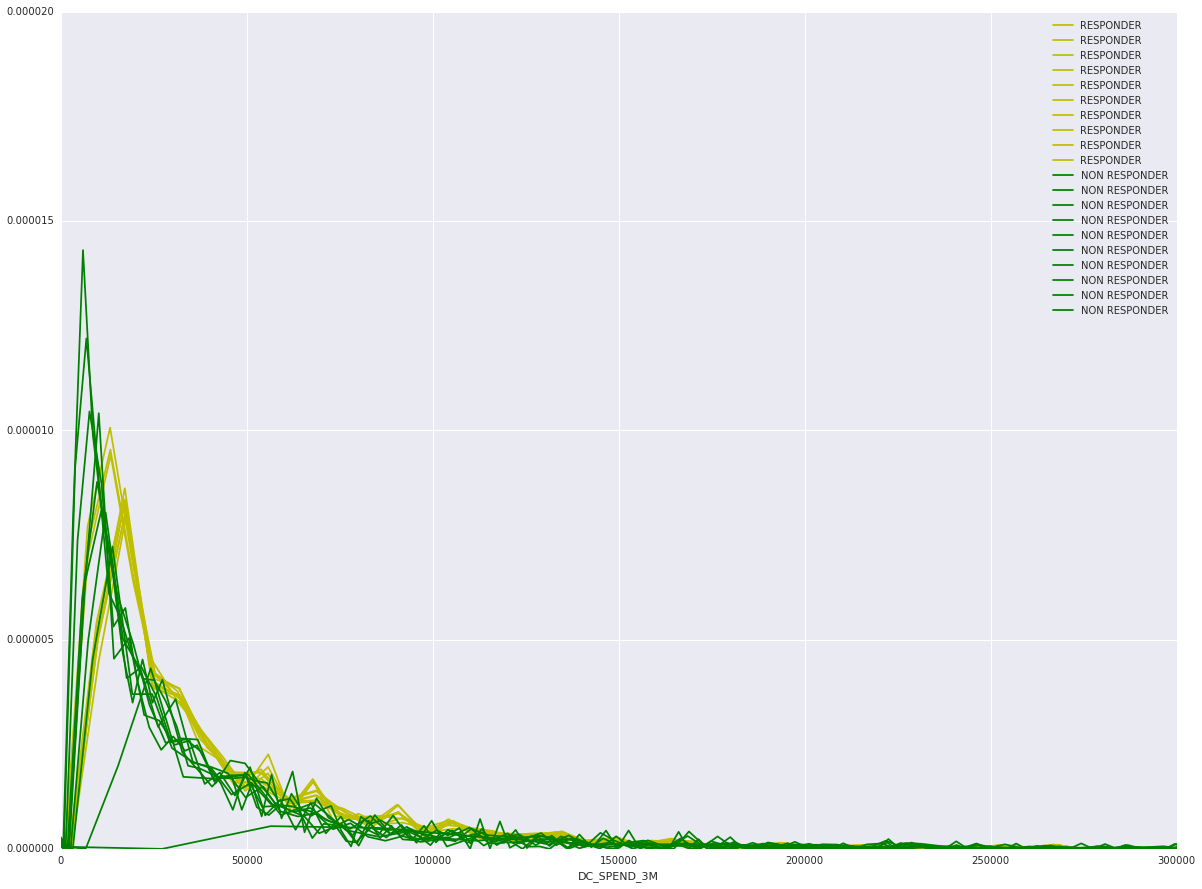

In [16]:
plt.figure(figsize=(20,15))
plt.axis([0,300000, 0, 0.00002])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["DC_SPEND_3M"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["DC_SPEND_3M"], hist=False, label="NON RESPONDER", ax = ax, color="g")
    
# ax = sns.distplot(cust_respond["DC_SPEND_3M"], hist=False, label="RESPONDER")
# for i in range(10):
#     random.seed(i)
#     rows = random.sample(cust_not_res.index, len(cust_respond))
#     cust_not_res_sample = cust_not_res.ix[rows]
#     sns.distplot(cust_not_res_sample["DC_SPEND_3M"], hist=False, label="NON RESPONDER", ax = ax, color="g")

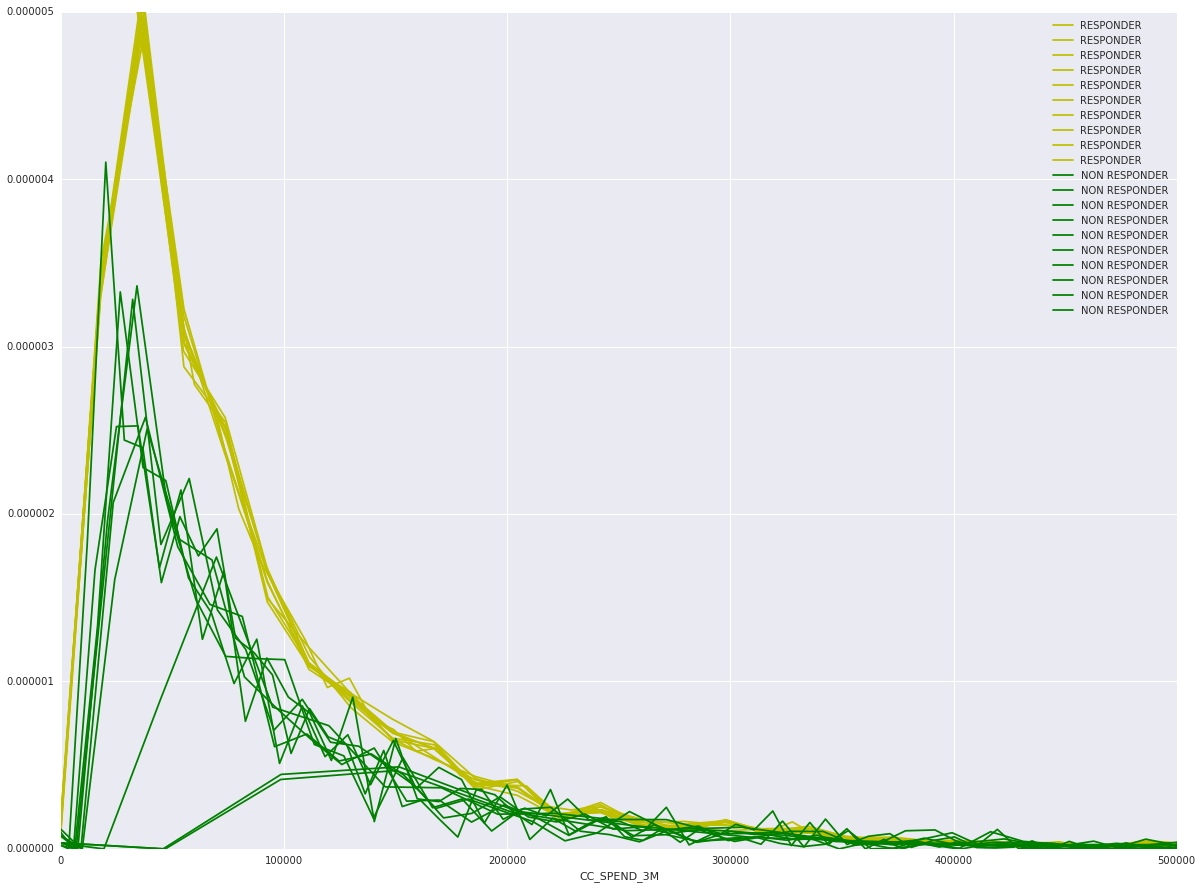

In [17]:
plt.figure(figsize=(20,15))
plt.axis([0,500000, 0, 0.000005])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["CC_SPEND_3M"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["CC_SPEND_3M"], hist=False, label="NON RESPONDER", ax = ax, color="g")
    
# ax = sns.distplot(cust_respond["CC_SPEND_3M"], hist=False, label="RESPONDER")
# for i in range(10):
#     seed = (i*1241)%17
#     random.seed(i)
#     rows = random.sample(cust_not_res.index, len(cust_respond))
#     cust_not_res_sample = cust_not_res.ix[rows]
#     sns.distplot(cust_not_res_sample["CC_SPEND_3M"], hist=False, label="NON RESPONDER", ax = ax, color="g")

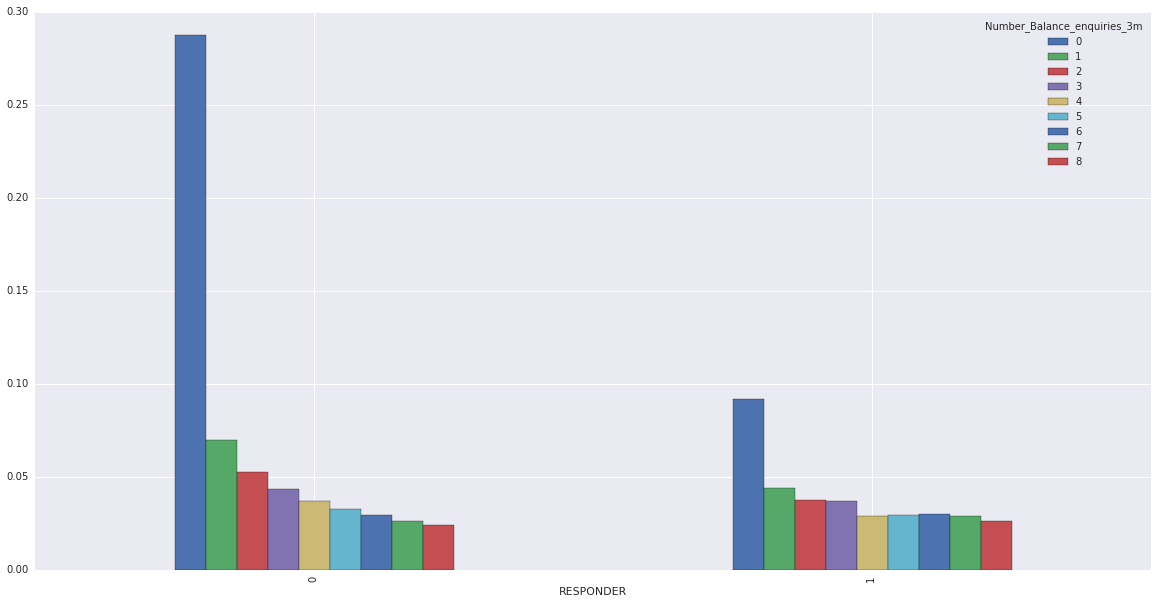

In [18]:
plot_categorical_variable("Number_Balance_enquiries_3m")
# ax = plt.axis([0,200,0,200])
# df_discrete = pd.pivot_table(customers,values='ID', index="Number_Balance_enquiries_3m", columns='RESPONDER', aggfunc=np.count_nonzero)
# df_discrete[0] = np.sqrt(df_discrete[0])
# df_discrete_subset = df_discrete.ix[0:40]
# plt.subplot(2,1,1)
# df_discrete_subset[0].plot(kind="bar", figsize=(20,15))
# plt.subplot(2,1,2)
# df_discrete_subset[1].plot(kind="bar", figsize=(20,15))

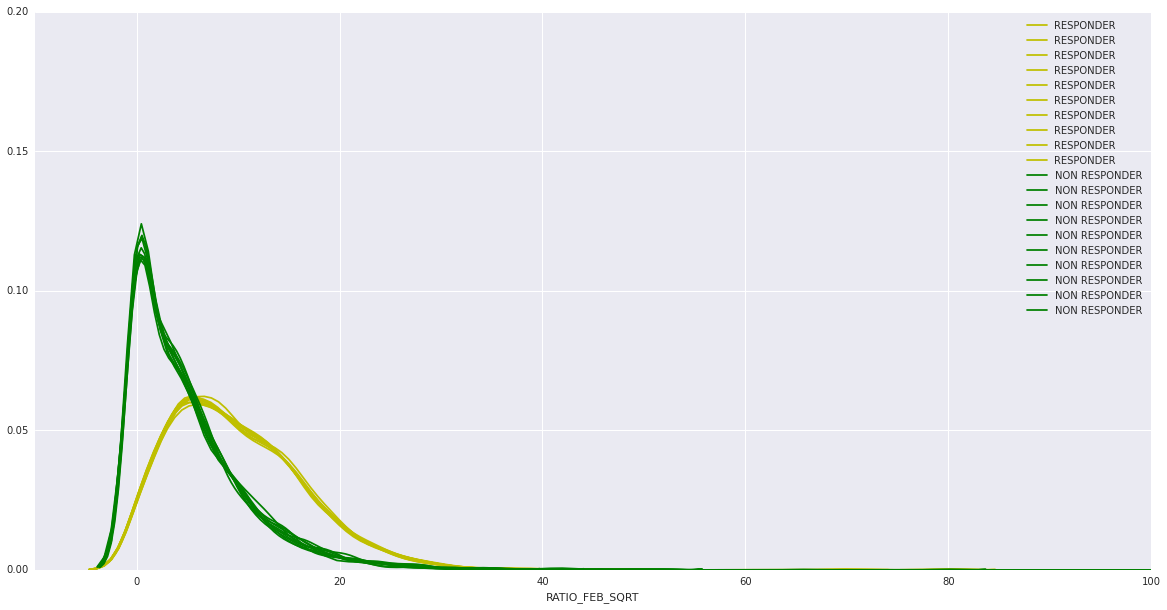

In [19]:
plt.figure(figsize=(20,10))
plt.axis([-10, 100, 0, 0.2])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["RATIO_FEB_SQRT"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["RATIO_FEB_SQRT"], hist=False, label="NON RESPONDER", ax = ax, color="g")

    
# ax = sns.distplot(cust_respond["RATIO_FEB_SQRT"], hist=False, label="RESPONDER")
# for i in range(10):
#     seed = (i*1241)%17
#     random.seed(i)
#     rows = random.sample(cust_not_res.index, len(cust_respond))
#     cust_not_res_sample = cust_not_res.ix[rows]
#     sns.distplot(cust_not_res_sample["RATIO_FEB_SQRT"], hist=False, label="NON RESPONDER", ax = ax, color="g")
# sns.distplot(cust_not_res["RATIO_FEB_SQRT"], hist=False, label="NON RESPONDER", ax = ax)

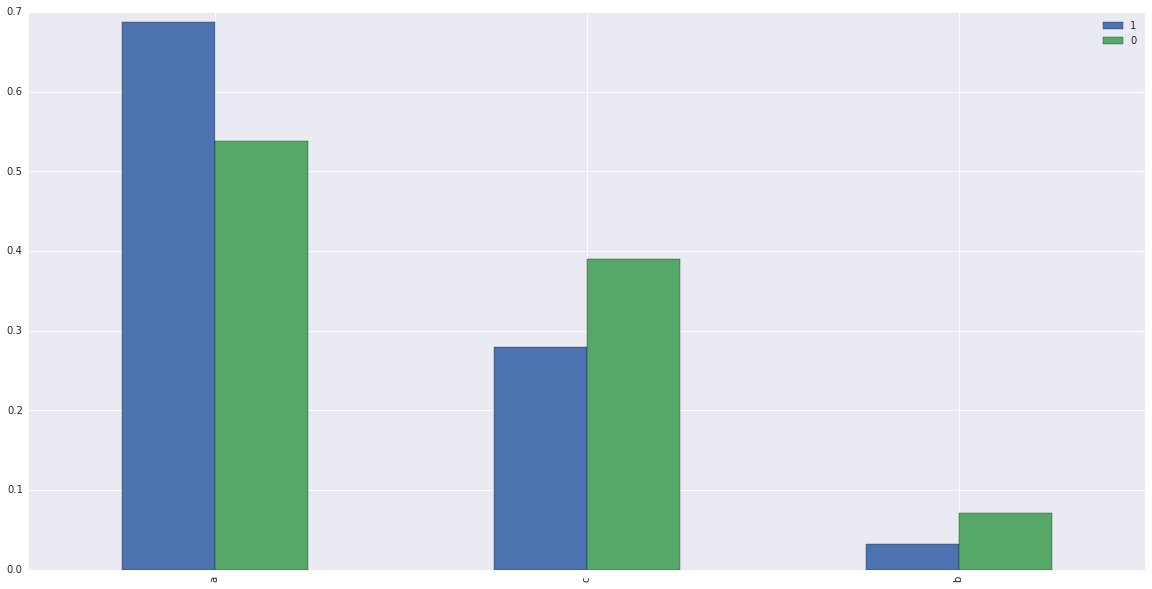

In [20]:
plot_categorical_variable_avg("hnw_segment")

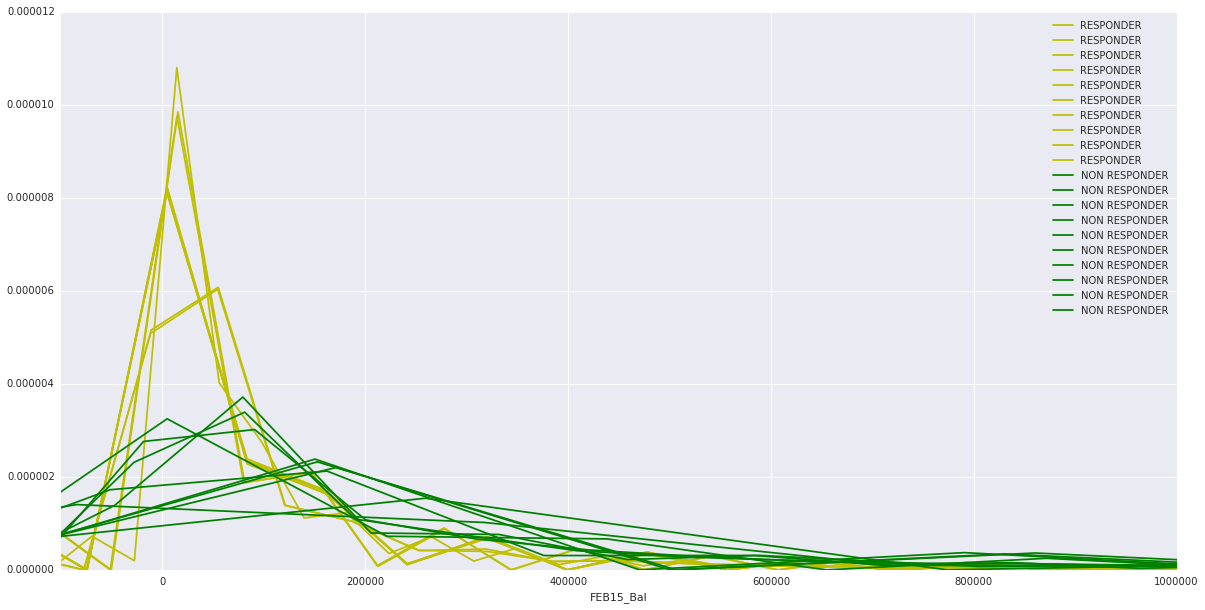

In [21]:

plt.figure(figsize=(20,10))
plt.axis([-100000, 1000000, 0, 0.000012])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["FEB15_Bal"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["FEB15_Bal"], hist=False, label="NON RESPONDER", ax = ax, color="g")


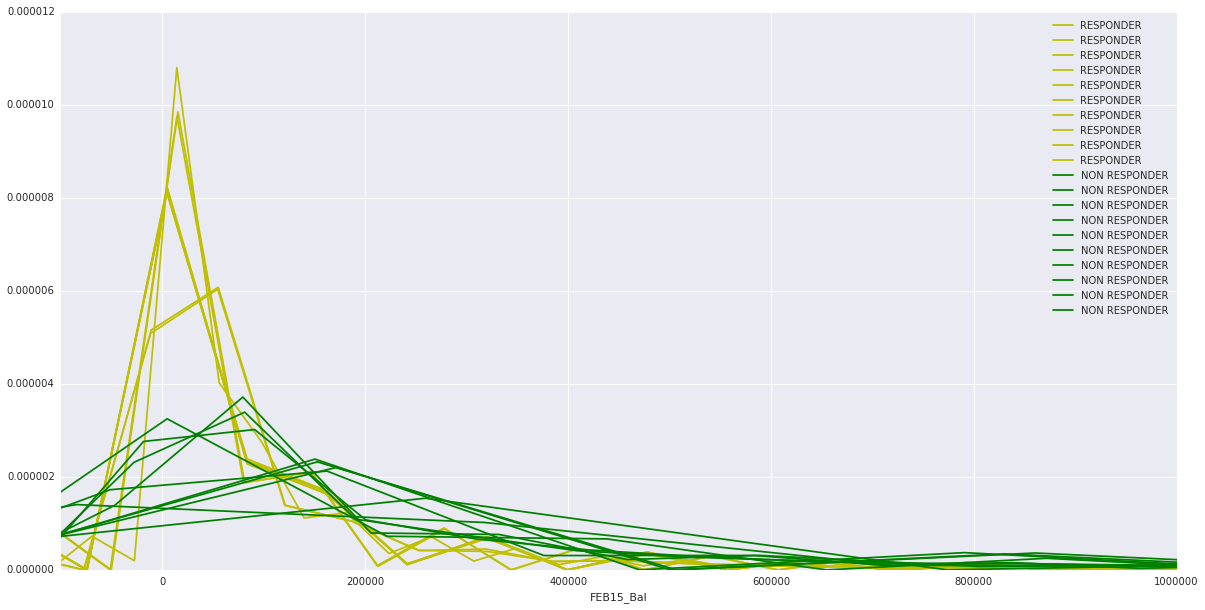

In [41]:

plt.figure(figsize=(20,10))
plt.axis([-100000, 1000000, 0, 0.000012])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(10):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["FEB15_Bal"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(10):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["FEB15_Bal"], hist=False, label="NON RESPONDER", ax = ax, color="g")


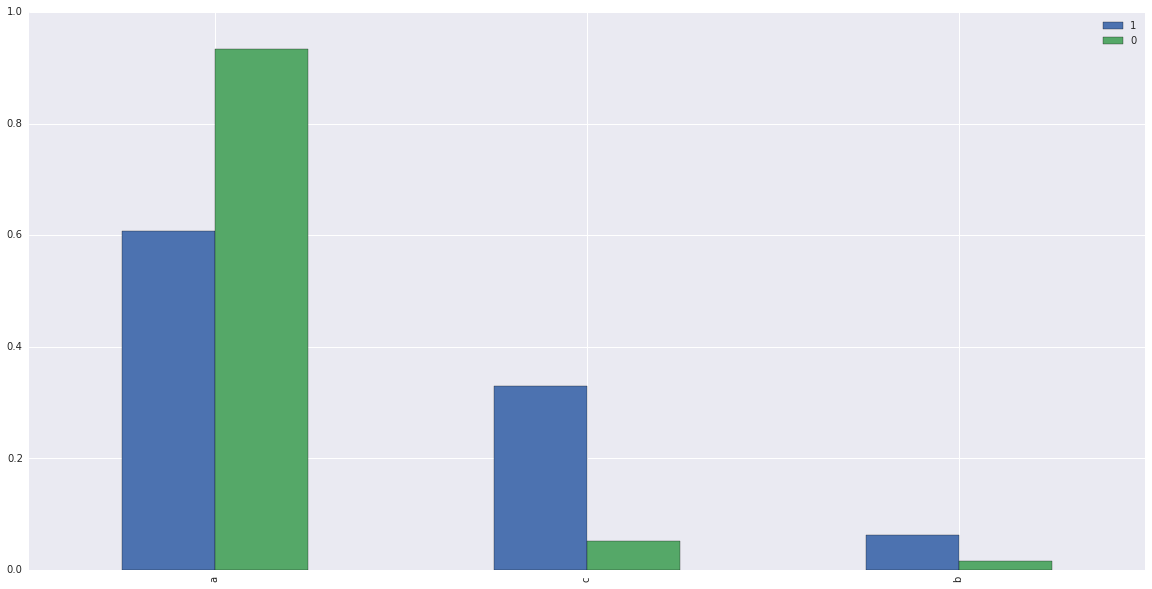

In [23]:
plot_categorical_variable_avg("pl_holding")

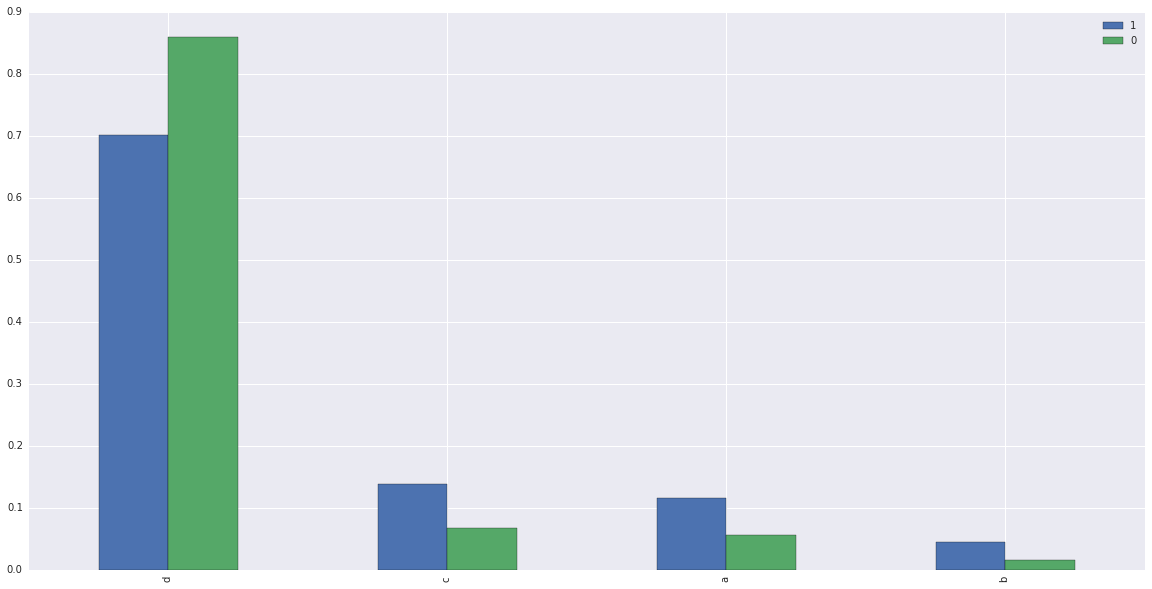

In [24]:
plot_categorical_variable_avg("OUR_BANK_OTHER_BANK_loan")

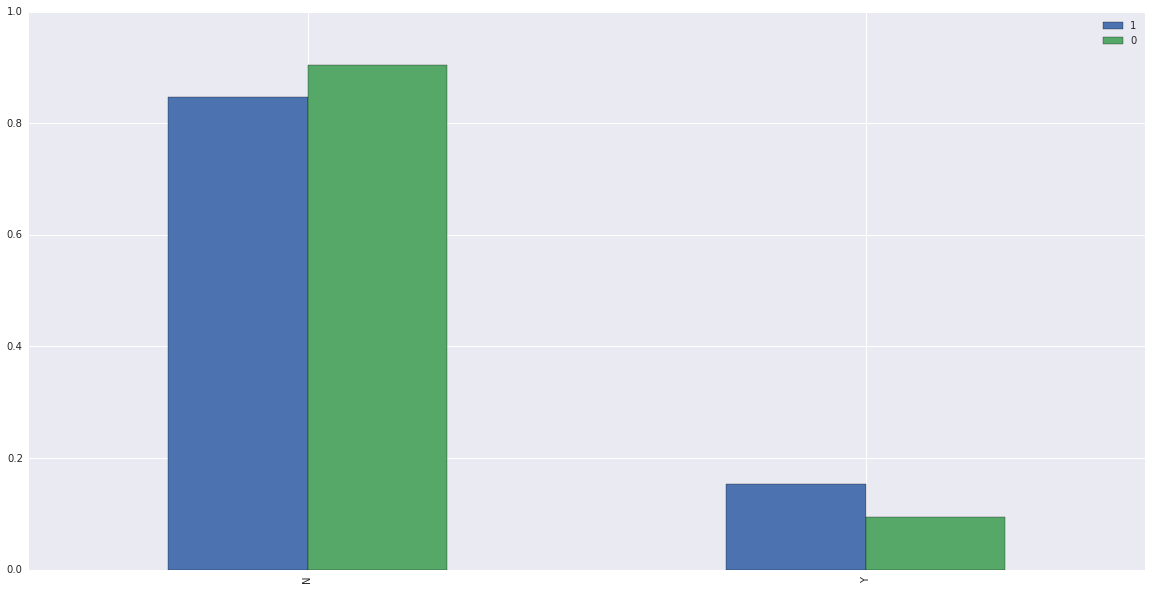

In [25]:
plot_categorical_variable_avg("event")

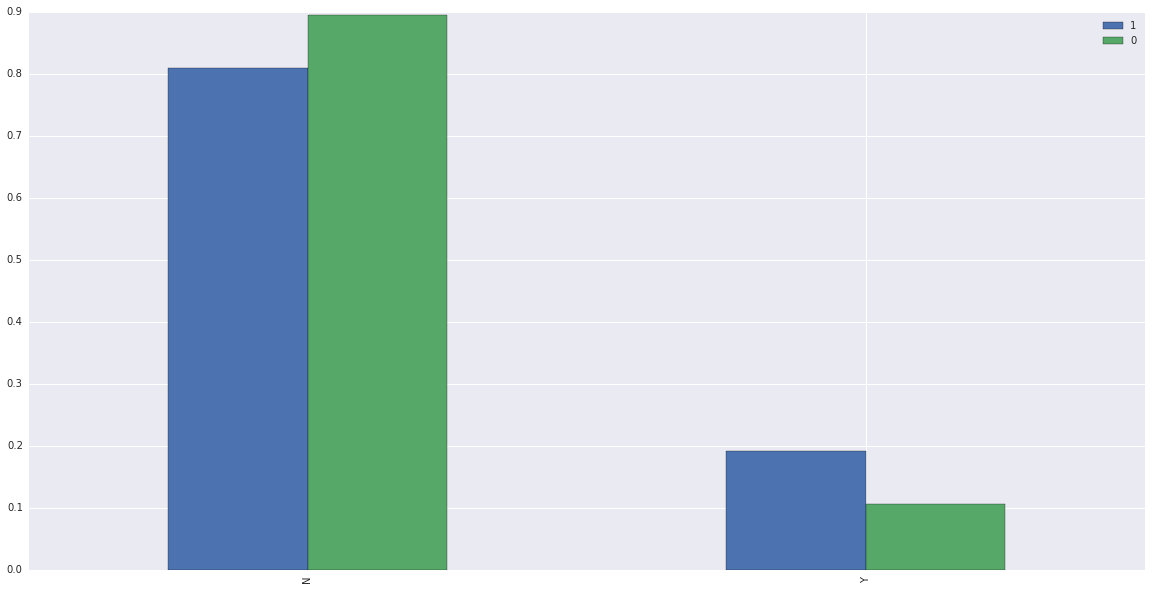

In [26]:
plot_categorical_variable_avg("Event_and_Credit_Card_cash_withd")

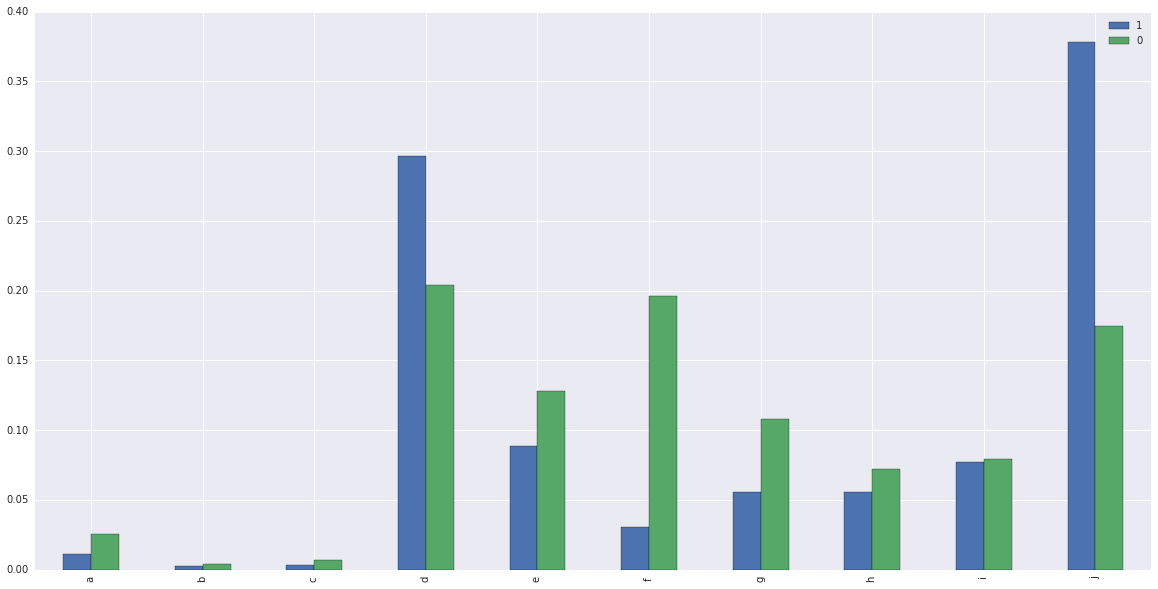

In [27]:
plot_categorical_variable_avg("ratio_eop_amb_bin")

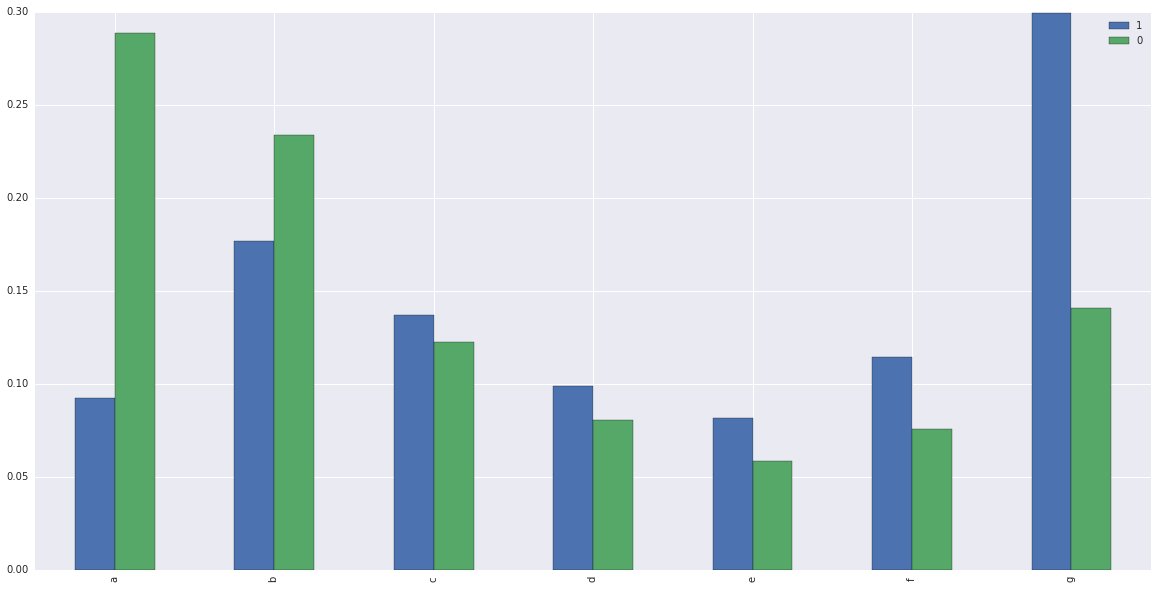

In [28]:
plot_categorical_variable_avg("balance_enquiry_bin")

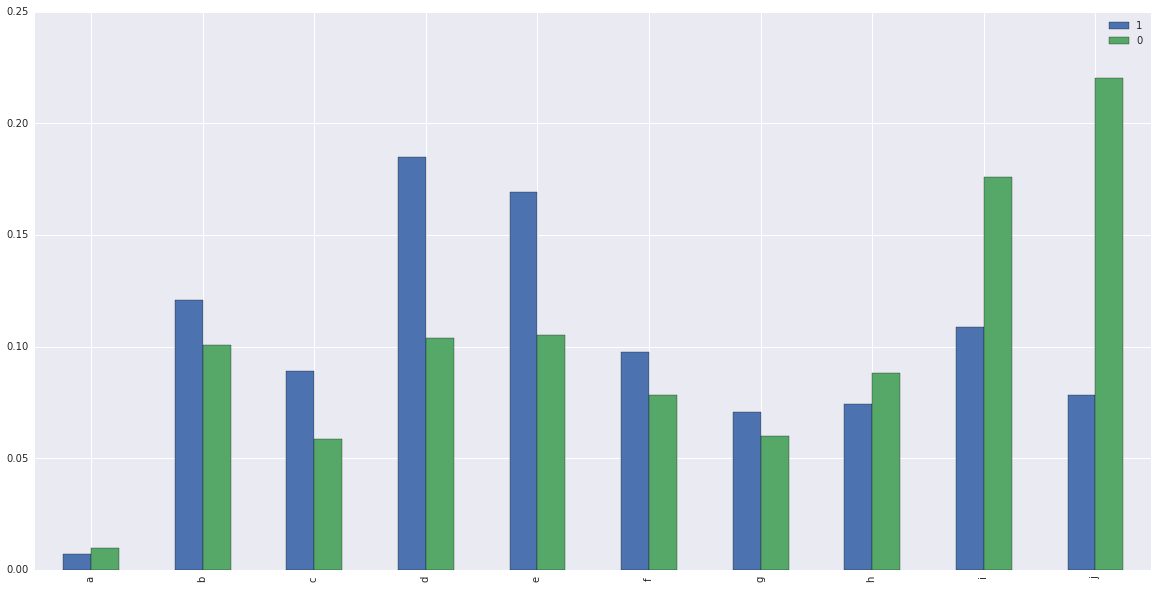

In [29]:
plot_categorical_variable_avg("Net_relationship_value_bin")

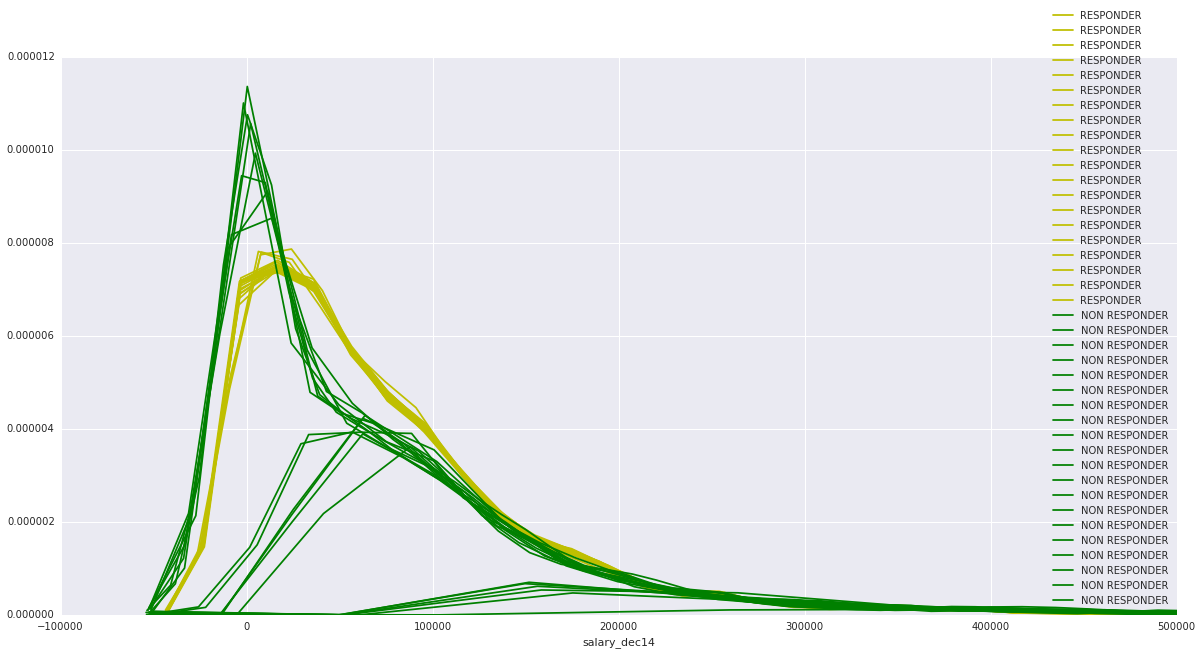

In [39]:

plt.figure(figsize=(20,10))
plt.axis([-100000, 500000, 0, 0.000012])
sns.set_style('darkgrid')
ax = plt.gca()
for i in range(20):
    random.seed(i)
    rows = random.sample(cust_respond.index, int(0.8*len(cust_respond)))
    cust_res_sample = cust_respond.ix[rows]
    sns.distplot(cust_res_sample["salary_dec14"], hist=False, label="RESPONDER", ax = ax, color="y")
                         
for i in range(20):
    seed = (i*1241)%17
    random.seed(i)
    rows = random.sample(cust_not_res.index, int(0.8*len(cust_respond)))
    cust_not_res_sample = cust_not_res.ix[rows]
    sns.distplot(cust_not_res_sample["salary_dec14"], hist=False, label="NON RESPONDER", ax = ax, color="g")


In [43]:
dec_subset = casa_dec[["N_F_BRANCH_TXN_AMT_LCY", "F_F_BRANCH_TXN_DRCR_IND", "Transaction_date", "ID"]]
dec_subset = casa_dec[["N_F_BRANCH_TXN_AMT_LCY", "F_F_BRANCH_TXN_DRCR_IND", "Transaction_date", "ID"]]

,N_F_BRANCH_TXN_AMT_LCY,F_F_BRANCH_TXN_DRCR_IND,Transaction_date,ID
0,2000.00,D,08DEC2014,1000005
1,16441.47,D,04DEC2014,1000005
2,2000.00,D,08DEC2014,1000005
3,10000.00,D,12DEC2014,1000005
4,10000.00,D,20DEC2014,1000005
5,10000.00,D,25DEC2014,1000005
6,12.50,C,31DEC2014,1000005
7,80650.00,C,31DEC2014,1000005
8,23347.00,D,10DEC2014,100001
9,621.24,D,19DEC2014,100001


In [30]:
pc_counts_non = pd.DataFrame(cust_not_res["product_code"].value_counts())
pc_counts_non["product_code_name"] = [product_codes[product_codes["Product Code"]==code]["Description"] for code in pc_counts_non.index]

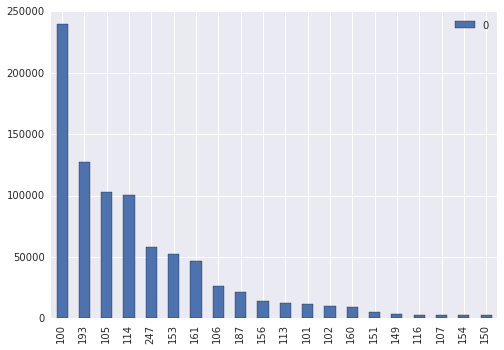

In [31]:
subset_pc_non = pc_counts_non[0:20]
subset_pc_non[["product_code_name",0]].plot(kind="bar")

In [32]:
pc_counts_res = pd.DataFrame(cust_respond["product_code"].value_counts())
pc_counts_res[0] = 
subset_pc_res = pc_counts_res[0:20]
subset_pc_res.plot(kind="bar")

SyntaxError: invalid syntax (<ipython-input-32-f80801c0a6a7>, line 2)

In [184]:
customers_train = customers[customers["Base_tag"]=="D"].copy()
for cat in ["Number_Balance_enquiries_3m"]:
    train_res = customers_train[customers_train["RESPONDER"]==1]
    res_val_counts = pd.DataFrame(train_res[cat].value_counts())
    res_val_counts = res_val_counts/len(res_val_counts)
    
    train_non = customers_train[customers_train["RESPONDER"]==0]
    non_val_counts = pd.DataFrame(train_non[cat].value_counts())
    non_val_counts = non_val_counts/len(non_val_counts)
    
    diff_val_counts = res_val_counts - non_val_counts
    print diff_val_counts.max(), diff_val_counts.min()
    diff_val_norm = (diff_val_counts - diff_val_counts.mean()) / (diff_val_counts.max() - diff_val_counts.min())
    customers_train[cat+"_norm"] = diff_val_norm

0    0.003922
dtype: float64 0   -201.468737
dtype: float64
